# 1.1.1

Usando il 100 blocchi, ognuno dei quali con 1000 numeri estratti, faccio la media a blocchi di una variabile estratta uniformemente fra 0 e 1.  
Usare la media a blocchi mi permette di diminuire fino a rendere trascurabile la correlazione tra i numeri estratti.  
Infatti il geneneratore usato è un generatore pseudo-casuale che genera ogni numero deterministicamente a partire  dall'ultimo numero generato.

La media viene stimata usando: $\langle r \rangle = \frac{1}{\# blocchi} \sum_{i}^{\# blocchi} x_i $.  
Dove $x_i$ rappresenta la media tra i valori dell'osservabile x nel blocco i-esimo.  
L'incertezza di questa stima viene calcolata usando:  
$\sigma=\frac{1}{\sqrt{\# blocchi}}(\sqrt{{\frac{1}{\# blocchi} \sum_{i}^{\# blocchi} x_i^2 + (\frac{1}{\# blocchi} \sum_{i}^{\# blocchi} x_i)^2}})$

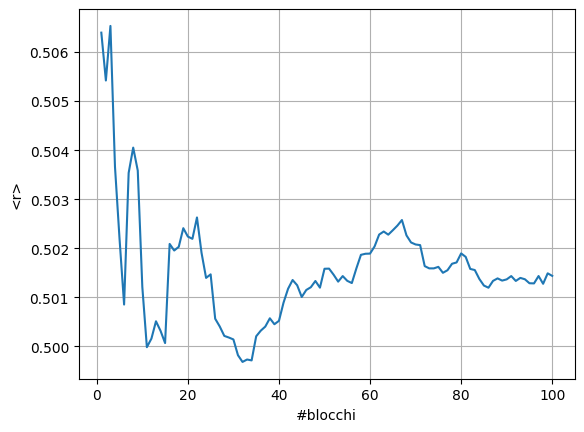

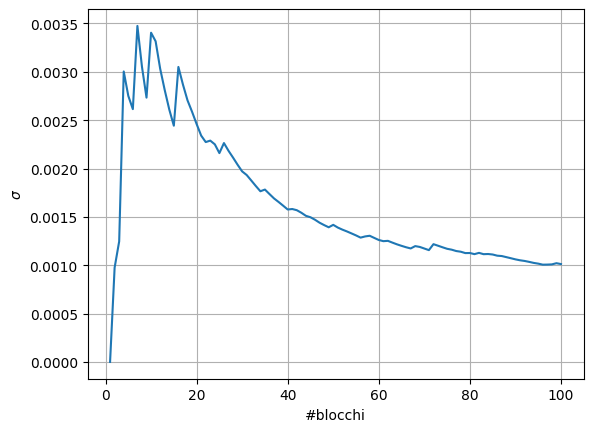

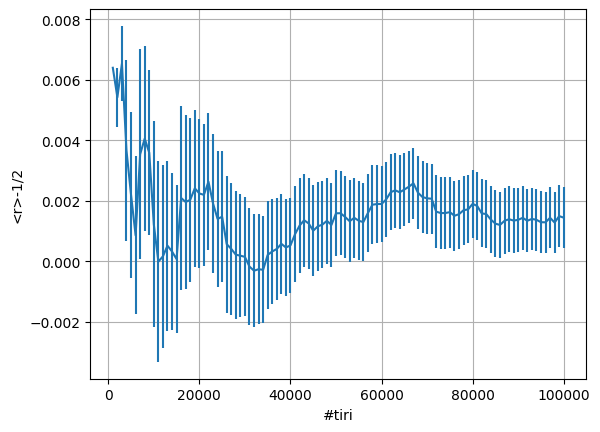

In [1]:
import matplotlib.pyplot as plt
import numpy as np

M=100000              # Numero totale di tiri
N=100                 # Numero di blocchi
L=int(M/N)			  # Numero di tiri per blocco
xx = np.arange(N)      # [0,1,2,...,N-1]
av_prog = np.zeros(N) # fatto un array di zeri con N numeri
err_prog = np.zeros(N)
# print (type(f))

with open("out_err", 'r') as f:# con with il file si chiude da solo appena finito 
    righe=f.read().split("\n")
    # print(righe)
    err=[]
    for i in righe:
            if(i!=""):
                try:
                    # print(i.split("\t"))
                    x,y=i.split("\t")
                    # print(i)
                    err.append([float(x),int(y)])
                except ValueError:
                    print(f"Il valore '{i}' non può essere convertito in float.")
        
    # print(err)
with open("out_av", 'r') as f:# con with il file si chiude da solo appena finito 
    righe=f.read().split("\n")
    # print(righe)
    av=[]
    for i in righe:
            if(i!=""):
                try:
                    # print(i.split("\t"))
                    x,y=i.split("\t")
                    # print(i)
                    av.append([float(x),int(y)])
                except ValueError:
                    print(f"Il valore '{i}' non può essere convertito in due float.")
    # print(av)
solo_err=[]
solo_av=[]
for i in err:
    solo_err.append(i[0])
for i in av:
    solo_av.append(i[0])
# print(solo_err)

xx=xx+1
bl=xx
# print(bl)
plt.plot(bl,solo_av)
plt.xlabel('#blocchi')
plt.ylabel('<r>')
plt.grid(True)
plt.show()
plt.subplots()
plt.plot(bl,solo_err)
plt.xlabel('#blocchi')
plt.ylabel('$\sigma$')
plt.grid(True)
plt.show()
xx*=L # Number of throws = block * (Number of throws in each block)
figure,ass=plt.subplots()
plt.errorbar(xx,np.array(solo_av)-0.5,yerr=solo_err)
plt.xlabel('#tiri')
plt.ylabel('<r>-1/2')
plt.grid(True)
plt.show()


    

# print(type(a[1]))

# err=float(f.read())
# av=double(g.read)
# print(errs)
# x*=L # Number of throws = block * (Number of throws in each block)
# plt.errorbar(x,av_prog-0.5,yerr=err_prog)
# plt.xlabel('#throws')
# plt.ylabel('<r>-1/2')
# plt.grid(True)
# plt.show()

Come si vede la media calcolata con pochi blocchi è soggetta ad alte oscillazioni in quanto è molto dipendente da effetti statistici.  Aumentando il numero di blocchi questa converge alla nostra migliore stima dell'osservabile misurata.

Ci apettiamo che il valore medio sia $\langle r \rangle = \int_0^1 r dr = 1/2$.  
Questo è in accordo con quanto ottenuto dalla simulazione.  All'aumentare del numero di blocchi, ottengo un valore di convergenza di $\langle r \rangle -  1/2$ compatibile entro due deviazioni standard con 0. 

Come predetto dal teorema del limite centrale l'errore degresce con l'aumento dei dati su cui medio ($\propto 1/\sqrt{N}$)

# 1.1.2

Faccio lo stesso procedimento dell'esercizio precedente ma questa volta la grandezza che mi interessa è la varianza della distribuzione.

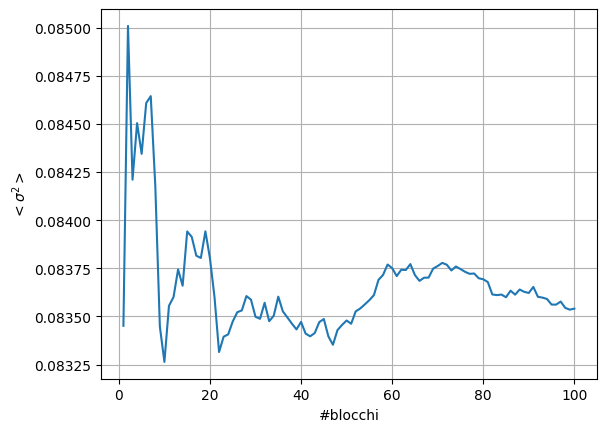

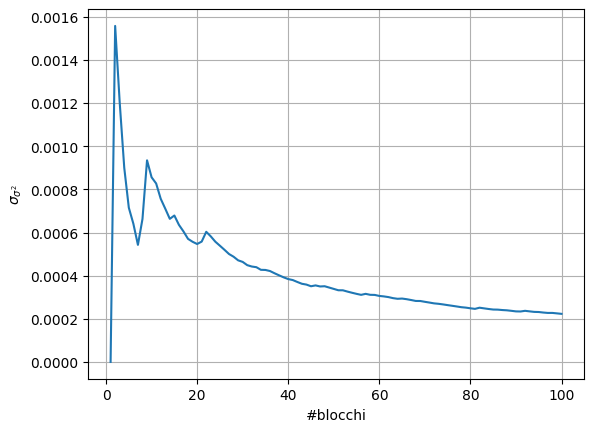

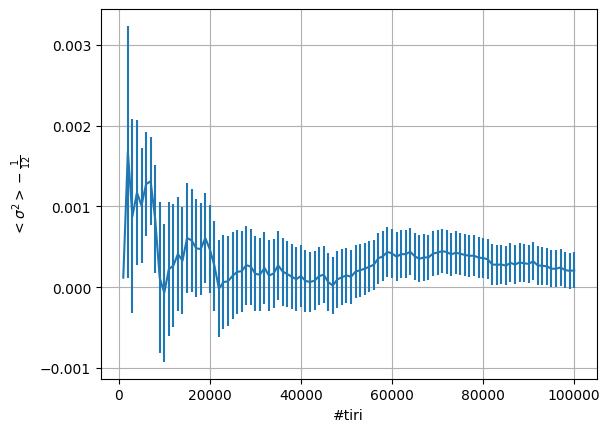

In [2]:
# es1.2

import matplotlib.pyplot as plt
import numpy as np

M=100000               # Numero totale di tiri
N=100                 # Numero di blocchi
L=int(M/N)			  # Numero di tiri per blocco
xx = np.arange(N)      # [0,1,2,...,N-1]
av_prog = np.zeros(N) # fatto un array di zeri con N numeri
err_prog = np.zeros(N)
# print (type(f))

with open("out_err_var", 'r') as f: # con with il file si chiude da solo appena finito 
    righe=f.read().split("\n")
    # print(righe)
    err=[]
    for i in righe:
            if(i!=""):
                try:
                    # print(i.split("\t"))
                    x,y=i.split("\t")
                    # print(i)
                    err.append([float(x),int(y)])
                except ValueError:
                    print(f"Il valore '{i}' non può essere convertito in float.")
        
    # print(err)
with open("out_var", 'r') as f:# con with il file si chiude da solo appena finito 
    righe=f.read().split("\n")
    # print(righe)
    av=[]
    for i in righe:
            if(i!=""):
                try:
                    # print(i.split("\t"))
                    x,y=i.split("\t")
                    # print(i)
                    av.append([float(x),int(y)])
                except ValueError:
                    print(f"Il valore '{i}' non può essere convertito in due float.")
    # print(av)
solo_err=[]
solo_ver=[]
for i in err:
    solo_err.append(i[0])
for i in av:
    solo_ver.append(i[0])
# print(solo_err)

xx=xx+1
bl=xx
# print(bl)
plt.plot(bl,solo_ver)
plt.xlabel('#blocchi')
plt.ylabel(r'$<\sigma^2>$')
plt.grid(True)
plt.show()
plt.subplots()
plt.plot(bl,solo_err)
plt.xlabel('#blocchi')
plt.ylabel(r'$\sigma_{\sigma^2}$')
plt.grid(True)
plt.show()
xx*=L # Number of throws = block * (Number of throws in each block)
figure,ass=plt.subplots()
plt.errorbar(xx,np.array(solo_ver)-(1./12.),yerr=solo_err)
plt.xlabel('#tiri')
plt.ylabel(r'$<\sigma^2>-\frac{1}{12}$')
plt.grid(True)
plt.show()

Nuovamente il valore teorico differisce dal valore calcolato di meno di 2 deviazioni standard.

# 1.1.3

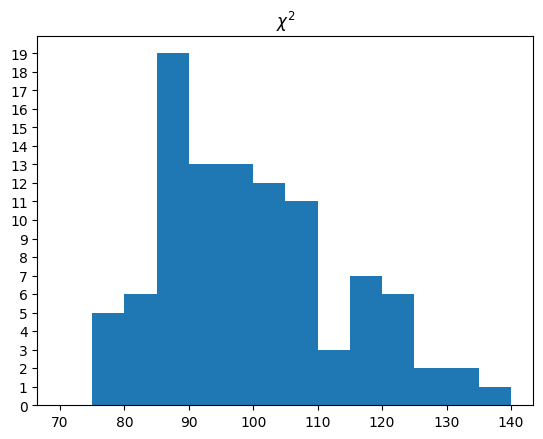

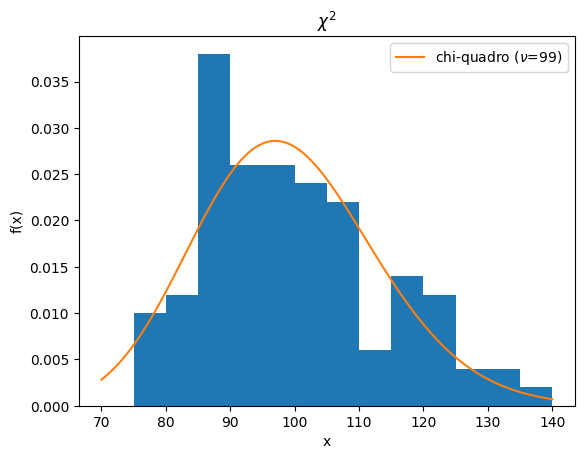

In [6]:
# es1.1.3
import matplotlib.pyplot as plt
import numpy as np
import scipy.special # gamma function

M=100
with open("out_chi2", 'r') as f: # con with il file si chiude da solo appena finito 
    righe=f.read().split("\n")
    # print(righe)
    # x=[]
    chi2=[]
    for i in righe:
            if(i!=""):
                try:
                    # print(i.split("\t"))
                    a,b=i.split("\t")
                    # print(i)
                    # x.append(float(b))
                    chi2.append(float(a))
                except ValueError:
                    print(f"Il valore '{i}' non può essere convertito in due float.")
plt.yticks(np.arange(0, 20, 1))
plt.title(r'$\chi^2$')
plt.hist(chi2,bins=(70,75,80,85,90,95,100,105,110,115,120,125,130,135,140))
plt.show()

plt.hist(chi2,bins=(70,75,80,85,90,95,100,105,110,115,120,125,130,135,140), density=True)
v=M-1
x = np.linspace(70, 140, 500)
chi2_teo=1./(2**(0.5*v)*scipy.special.gamma(0.5*v))*(x**(0.5*v-1))*np.exp(-0.5*x)
plt.plot(x, chi2_teo, label=r'chi-quadro ($\nu$='+str(v)+')')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(r'$\chi^2$')
plt.legend()
# plt.grid(True)
plt.show()

Come ci aspettavamo la media dei $\chi_j$ è circa 100 (numero dei sottointervalli).  
(In realà mi verrebbe da dire che il valore medio dovrebbe essere pari ai gradi di libertà che sono M-1=99)  
I dati generati mostrano quindi una buona probabilità che l'ipotesi che essi seguano una distribuzione uniforme sia vera.